In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

In [2]:
import os

In [3]:
df = pd.read_csv('crime.csv', engine='python') # Read in the data 

In [4]:
df.head() # View the top rows of the dataset

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
# Taking only the most recent year (2018) and dropping the rest
df.drop(df.index[df['YEAR'] != 2018], inplace = True)

In [6]:
df['DISTRICT'].replace('', np.nan, inplace=True) #Fill in the blanks as NaN

In [7]:
df.head(20) # View the top rows of the dataset

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [8]:
df.dropna(subset=['DISTRICT'], inplace=True) #Drop the missing districts

In [9]:
df = df.reset_index(drop=True) #Reset the index

In [11]:
# Shape of the data frame
df.shape

(65141, 17)

In [12]:
df['DISTRICT'].value_counts() #The total crimes per major category

B2     9872
D4     8601
C11    8282
B3     7485
A1     7404
C6     5199
D14    4059
E18    3773
E13    3662
E5     2755
A7     2724
A15    1325
Name: DISTRICT, dtype: int64

In [13]:
df['DAY_OF_WEEK'].value_counts() #The total amount of crime per day

Friday       9853
Thursday     9586
Wednesday    9575
Tuesday      9475
Monday       9449
Saturday     9144
Sunday       8059
Name: DAY_OF_WEEK, dtype: int64

In [14]:
pd.pivot_table(df,index=['DISTRICT'],values=['INCIDENT_NUMBER'], columns = ['DAY_OF_WEEK'], aggfunc='count') #Pivot table of district and day

INCIDENT_NUMBER                                                  
DAY_OF_WEEK          Friday Monday Saturday Sunday Thursday Tuesday Wednesday
DISTRICT                                                                     
A1                     1150   1030     1208    960     1022    1025      1009
A15                     195    215      146    150      202     201       216
A7                      435    371      351    366      411     375       415
B2                     1508   1413     1352   1187     1421    1462      1529
B3                     1154   1112     1054    925     1068    1079      1093
C11                    1183   1257     1103   1039     1245    1222      1233
C6                      792    775      742    653      773     751       713
D14                     644    586      608    479      603     557       582
D4                     1275   1214     1240   1103     1319    1208      1242
E13                     585    546      458    419      539     574       541
E18                     532    534      540    464      552     581       570
E5                      400    396      342    314      431     440       432

In [16]:
pd.pivot_table(df,index=['OFFENSE_CODE_GROUP'],values=['INCIDENT_NUMBER'], columns = ['DISTRICT'], aggfunc='count') #Pivot table of offense code group and district

INCIDENT_NUMBER                               \
DISTRICT                                      A1    A15     A7      B2     B3   
OFFENSE_CODE_GROUP                                                              
Aggravated Assault                         219.0   36.0   76.0   322.0  220.0   
Aircraft                                     NaN    NaN    6.0     NaN    NaN   
Arson                                        1.0    2.0    NaN     3.0    3.0   
Assembly or Gathering Violations            52.0    1.0    1.0    43.0    3.0   
Auto Theft                                  69.0   13.0   33.0   174.0   97.0   
Auto Theft Recovery                          7.0    4.0   13.0    45.0   31.0   
Ballistics                                   2.0    2.0    4.0    39.0   38.0   
Bomb Hoax                                    NaN    NaN    NaN     2.0    1.0   
Commercial Burglary                         57.0    3.0    3.0    23.0   19.0   
Confidence Games                           114.0   16.0   13.0    51.0   43.0   
Counterfeiting                              24.0    3.0    6.0    26.0   21.0   
Criminal Harassment                          2.0    NaN    4.0     2.0    NaN   
Disorderly Conduct                         111.0   12.0   19.0    57.0   31.0   
Drug Violation                             357.0   73.0  156.0   504.0  345.0   
Embezzlement                                 3.0    NaN    NaN     3.0    4.0   
Evading Fare                                13.0    NaN    4.0    16.0    8.0   
Explosives                                   NaN    NaN    1.0     2.0    NaN   
Fire Related Reports                        36.0   10.0   19.0    56.0   55.0   
Firearm Discovery                           11.0    3.0    3.0    26.0   14.0   
Firearm Violations                          37.0    7.0   21.0    86.0   69.0   
Fraud                                      221.0   20.0   54.0   150.0  145.0   
HOME INVASION                                NaN    NaN    1.0     5.0    NaN   
Harassment                                  59.0   20.0   35.0   150.0  118.0   
Harbor Related Incidents                     8.0    NaN   10.0     1.0    NaN   
Homicide                                     1.0    NaN    1.0    11.0    7.0   
Investigate Person                         358.0  100.0  135.0   532.0  561.0   
Investigate Property                       308.0   48.0   65.0   331.0  347.0   
Landlord/Tenant Disputes                     3.0    6.0   12.0    25.0   73.0   
Larceny                                    985.0   74.0  171.0   482.0  261.0   
Larceny From Motor Vehicle                 231.0   40.0   65.0   277.0  137.0   
License Plate Related Incidents              9.0    1.0   14.0    12.0   14.0   
License Violation                          120.0    4.0   21.0    18.0   16.0   
Liquor Violation                            14.0    1.0    7.0   107.0   56.0   
Medical Assistance                         539.0  123.0  326.0   749.0  535.0   
Missing Person Located                      24.0    8.0   31.0   202.0  223.0   
Missing Person Reported                     23.0    9.0   26.0   145.0  180.0   
Motor Vehicle Accident Response            613.0  213.0  323.0  1258.0  783.0   
Offenses Against Child / Family              3.0    4.0    5.0    21.0   13.0   
Operating Under the Influence               11.0    3.0   14.0    21.0    2.0   
Other                                      431.0   68.0  135.0   634.0  463.0   
Other Burglary                               7.0    NaN    1.0     9.0    6.0   
Phone Call Complaints                        NaN    1.0    NaN     NaN    NaN   
Police Service Incidents                   124.0   35.0   27.0    49.0  106.0   
Prisoner Related Incidents                  11.0    1.0    NaN     7.0   11.0   
Property Found                             123.0    8.0   40.0    78.0   42.0   
Property Lost                              442.0   31.0   64.0   287.0  215.0   
Property Related Damage                     12.0    2.0   13.0  

In [17]:
df['OFFENSE_CODE_GROUP'].value_counts() #Count of offense code group

Motor Vehicle Accident Response     7564
Medical Assistance                  5582
Larceny                             5195
Other                               3806
Investigate Person                  3795
Simple Assault                      3562
Drug Violation                      3165
Verbal Disputes                     3050
Vandalism                           2802
Towed                               2535
Investigate Property                2511
Property Lost                       2231
Larceny From Motor Vehicle          2016
Aggravated Assault                  1640
Fraud                               1276
Violations                          1181
Warrant Arrests                     1139
Missing Person Located               937
Auto Theft                           924
Property Found                       878
Residential Burglary                 872
Harassment                           806
Robbery                              789
Police Service Incidents             732
Missing Person R

In [18]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.0


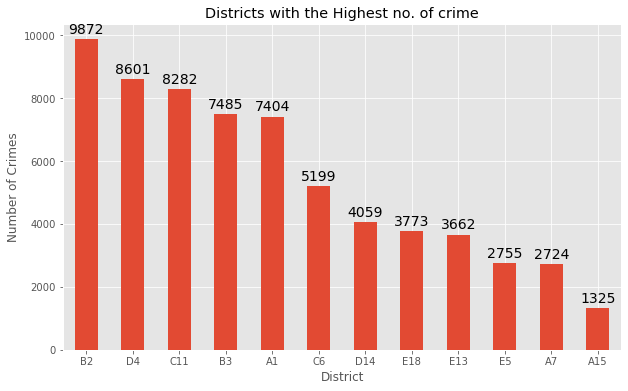

In [19]:
df_tt = df['DISTRICT'].value_counts()

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('District') # add y-label to the plot
ax.set_title('Districts with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

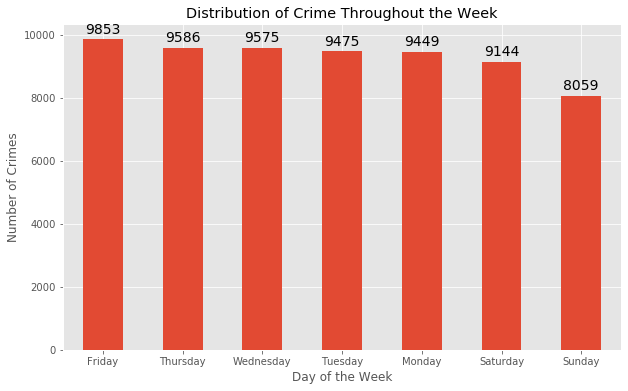

In [20]:
df['DAY_OF_WEEK'].value_counts()

df_tt = df['DAY_OF_WEEK'].value_counts()

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Day of the Week') # add y-label to the plot
ax.set_title('Distribution of Crime Throughout the Week') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [21]:
zz = df['OFFENSE_CODE_GROUP'].value_counts()
zz.head(10) #Top offense code groups

Motor Vehicle Accident Response    7564
Medical Assistance                 5582
Larceny                            5195
Other                              3806
Investigate Person                 3795
Simple Assault                     3562
Drug Violation                     3165
Verbal Disputes                    3050
Vandalism                          2802
Towed                              2535
Name: OFFENSE_CODE_GROUP, dtype: int64

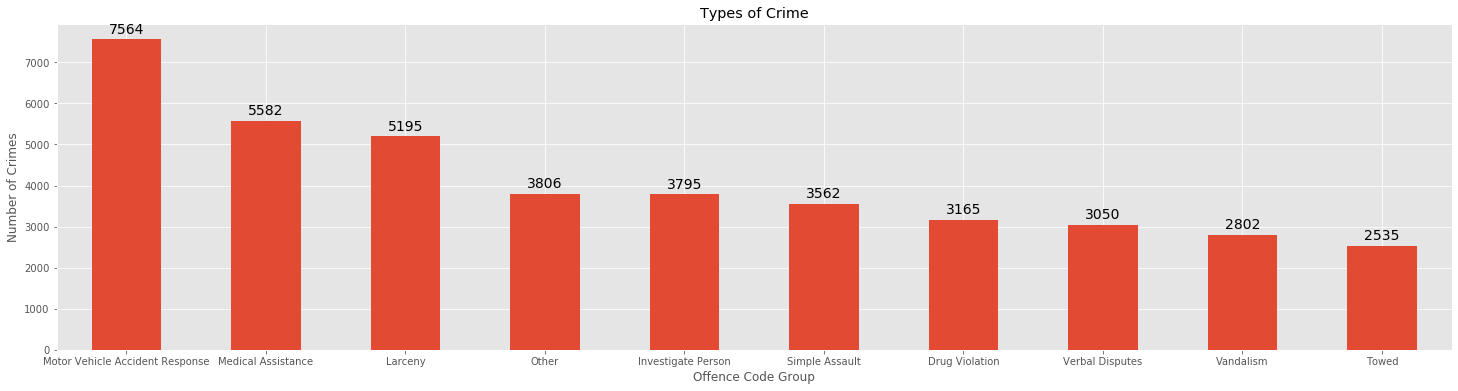

In [22]:
df_tt = zz.head(10)

ax = df_tt.plot(kind='bar', figsize=(25, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Offence Code Group') # add y-label to the plot
ax.set_title('Types of Crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [23]:
df.describe() #Statistical Analysis

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,65141.000000,65141.0,65141.000000,65141.000000,60968.000000,60968.000000
mean,2357.715525,2018.0,4.662747,13.099384,42.301265,-71.049630
std,1174.774400,0.0,2.297052,6.261562,0.945161,1.528421
min,111.000000,2018.0,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2018.0,3.000000,9.000000,42.296907,-71.097387
50%,3006.000000,2018.0,5.000000,14.000000,42.325321,-71.077783
75%,3205.000000,2018.0,7.000000,18.000000,42.348406,-71.062563
max,3831.000000,2018.0,9.000000,23.000000,42.395042,-1.000000


In [24]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import folium
from folium import plugins

In [25]:
df = pd.read_csv('crime.csv', encoding='latin-1') # read CSV

In [26]:
df.shape # Shape of the data frame

(319073, 17)

In [27]:
df.columns # Name of the columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [28]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [29]:
def print_five_rows(name_column):
    return df[name_column][0:5] #Data preparation

In [30]:
def describe_column(name_column):
    return df[name_column].describe() #Data preparation

In [31]:
# Data Preparation
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0 

In [32]:
# Data Preparation
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

In [33]:
#Drop NaN values
def drop_NaN_two_var(x, y):

    df1 = df[[x, y]].dropna()
    print(df1.shape)

    x_value = df1[x]
    y_value = df1[y]

    del df1
        
    print(x + ': ' + str(x_value.shape))
    print(y + ': ' + str(y_value.shape))
        
    return x_value, y_value

In [34]:
#Data Preparation
def function_OLS_Regression(x, y):
    
    model = sm.OLS(y, x)
    res = model.fit()
    return res.summary()

In [35]:
df.shape # Shape of the data frame

(319073, 17)

In [36]:
df.isnull().sum() #Data Analysis

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [37]:
print_five_rows('INCIDENT_NUMBER') #Data Analysis

0    I182070945
1    I182070943
2    I182070941
3    I182070940
4    I182070938
Name: INCIDENT_NUMBER, dtype: object

In [38]:
describe_column('INCIDENT_NUMBER') #Data Analysis

count         319073
unique        282517
top       I162030584
freq              13
Name: INCIDENT_NUMBER, dtype: object

In [39]:
df[['Lat', 'Long']].head() #Data Analysis

,Lat,Long
0,42.357791,-71.139371
1,42.306821,-71.060300
2,42.346589,-71.072429
3,42.334182,-71.078664
4,42.275365,-71.090361


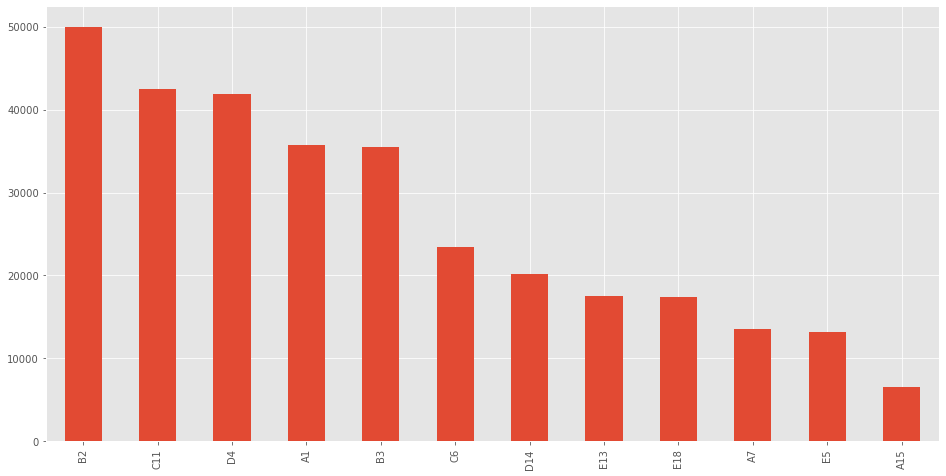

In [40]:
#Amount of crime per district
plt.figure(figsize=(16,8))
df['DISTRICT'].value_counts().plot.bar()
plt.show()

In [41]:
list_unique_year, list_number_year = create_list_number_crime('YEAR',df['YEAR'].unique()) # Preparation for pie chart

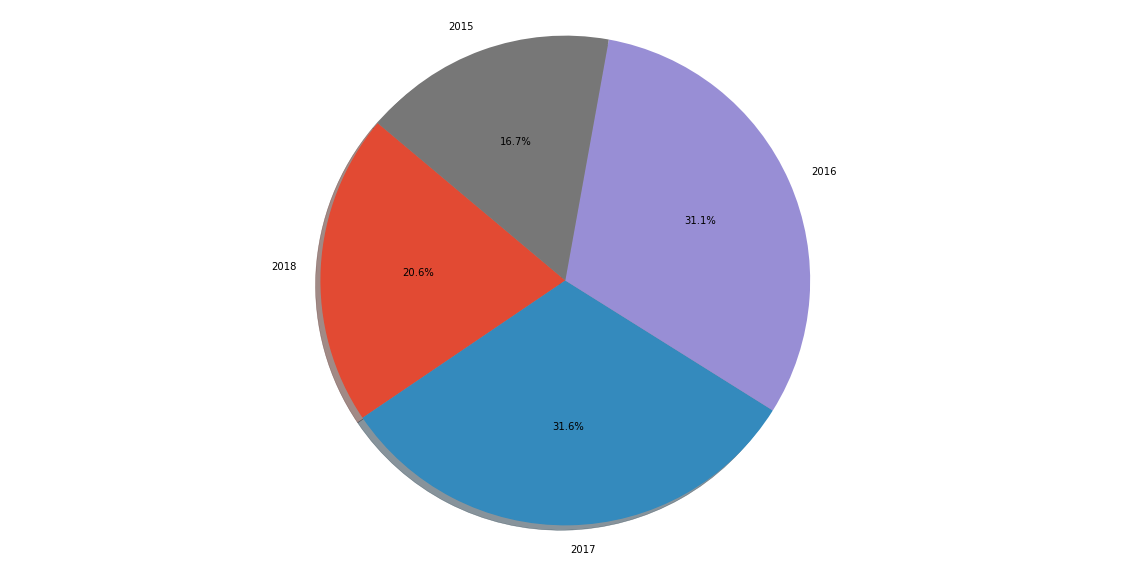

0

In [44]:
pie_plot(list_unique_year, list_number_year) #Total number crime for each year

In [45]:
#Prepare data for shooting details
df['SHOOTING'].fillna(0, inplace = True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

In [46]:
#Prepare data for shooting details
shoot_true = len(df.loc[df['SHOOTING'] == 1])
shoot_false = len(df.loc[df['SHOOTING'] == 0])

In [47]:
#Prepare data for shooting details
print('With shooting(num): ' + str(shoot_true))
print('With shooting(%):   ' + str(round(shoot_true*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(shoot_false))
print('Without shooting(%):   ' + str(round(shoot_false*100/len(df),2))+'%')

With shooting(num): 1019
With shooting(%):   0.32%

Without shooting(num): 318054
Without shooting(%):   99.68%


In [48]:
#Prepare data for shooting details
df_shoot = df.loc[df['SHOOTING'] == 1]
df_shoot.shape

(1019, 17)

In [49]:
#Prepare data for shooting details
shoot_y_2015 = len(df_shoot.loc[df_shoot['YEAR'] == 2015])
shoot_y_2016 = len(df_shoot.loc[df_shoot['YEAR'] == 2016])
shoot_y_2017 = len(df_shoot.loc[df_shoot['YEAR'] == 2017])
shoot_y_2018 = len(df_shoot.loc[df_shoot['YEAR'] == 2018])

unique_shoot_year = '2015', '2016', '2017', '2018'
number_shoot_year = [shoot_y_2015, shoot_y_2016, shoot_y_2017, shoot_y_2018]

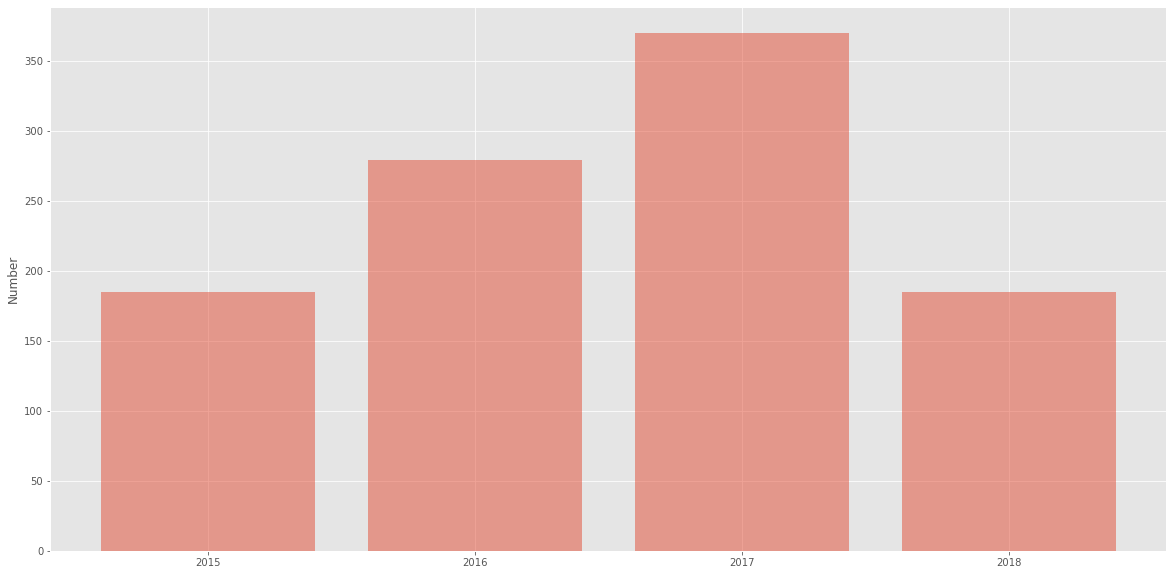

0

In [50]:
# Bar_plot(unique_shoot_year,unique_shoot_year)
bar_chart(number_shoot_year,unique_shoot_year)

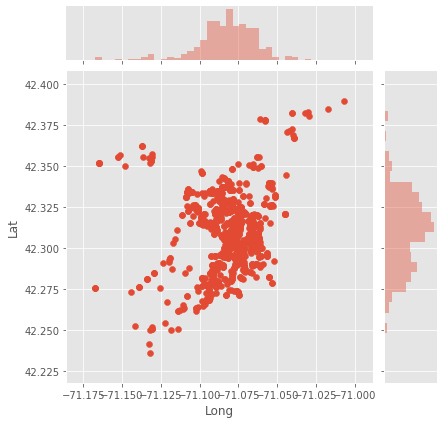

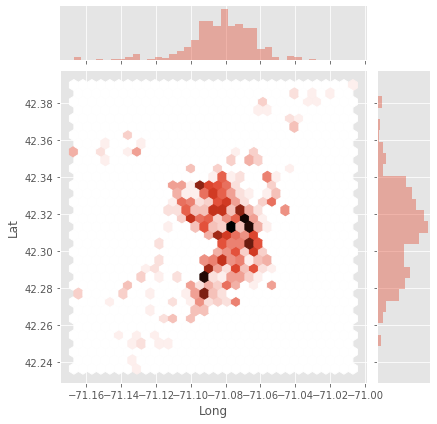

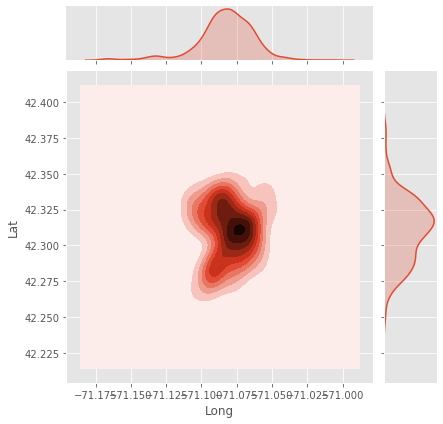

In [52]:
#Location and Shooting Details
location_shoot = df_shoot[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x_shoot, y_shoot, kind='scatter')
sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')

In [53]:
#latitude and longitude details
location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]  

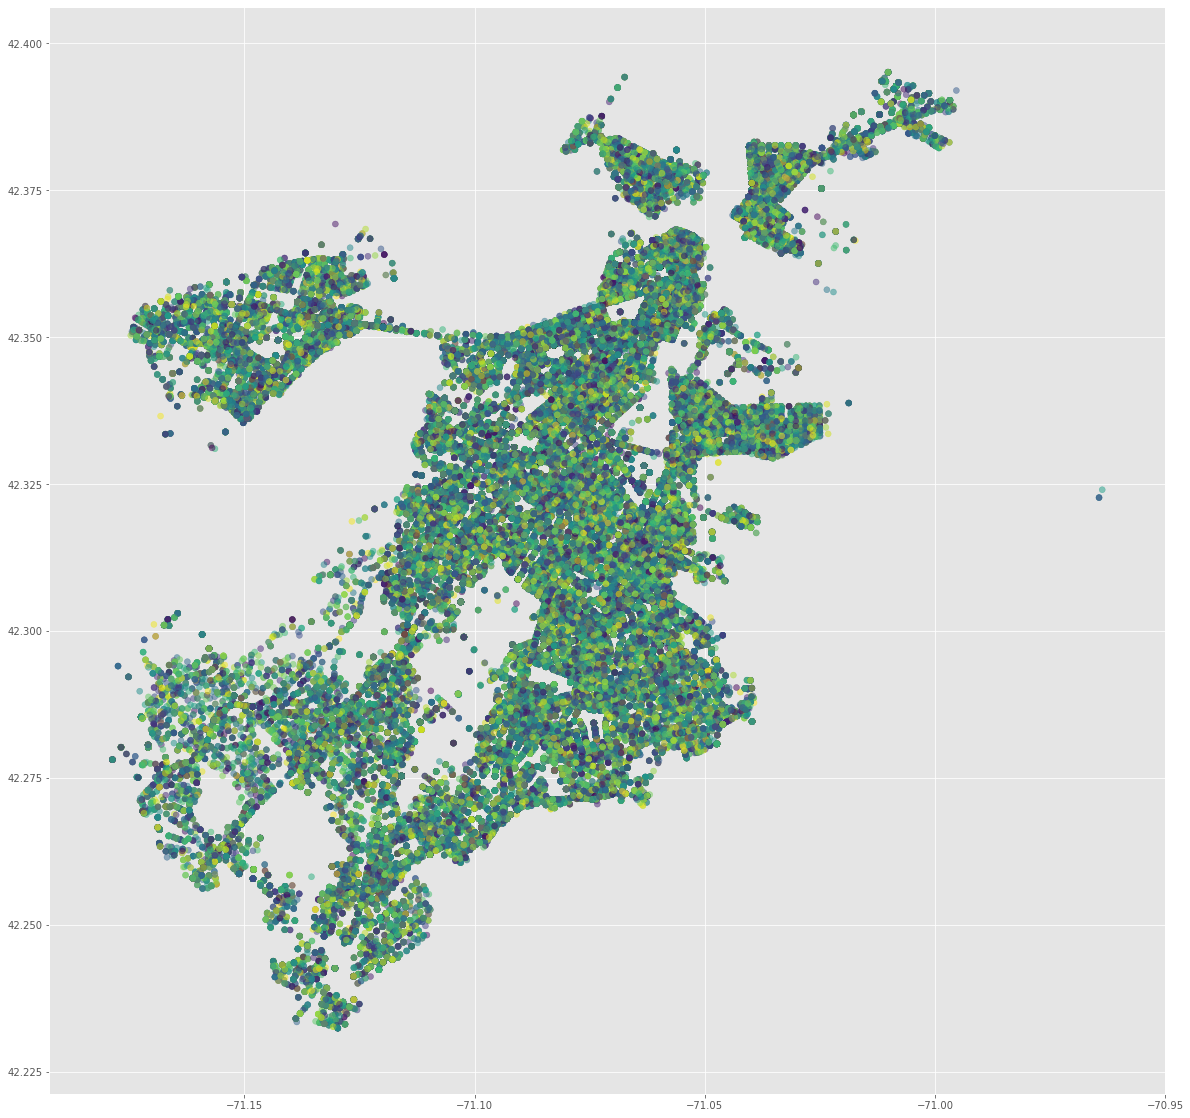

In [54]:
#latitude and longitude details
x = location['Long']
y = location['Lat']


colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [55]:
#Clustering
from sklearn.cluster import KMeans

In [56]:
X = location
X = X[~np.isnan(X)]

In [57]:
#K-means Clustering: 2 iterations 
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

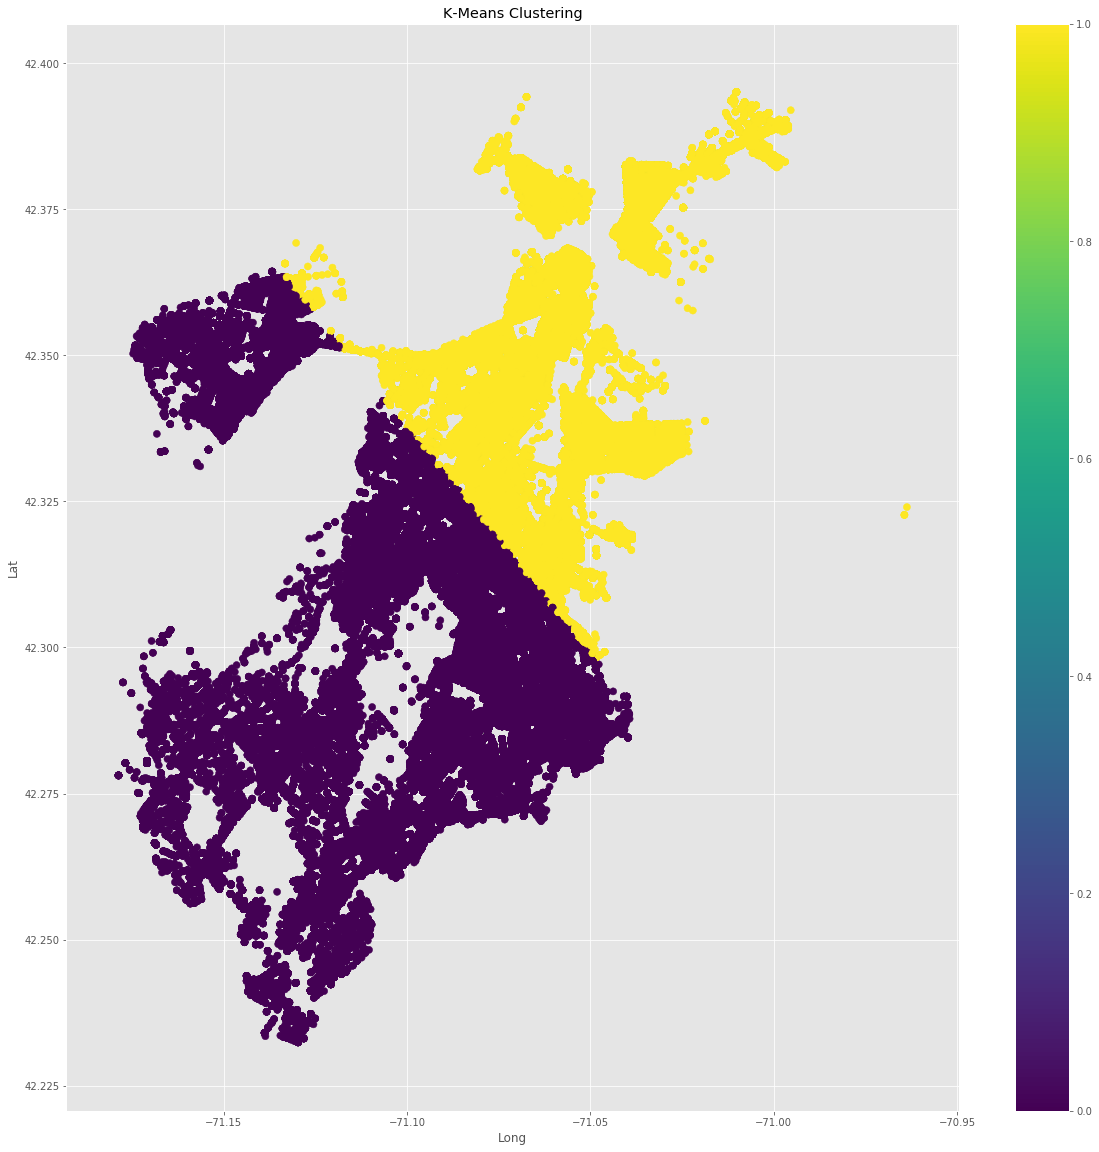

In [58]:
#Plot the clusters obtained using k-means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [59]:
X = location
X = X[~np.isnan(X)]

In [60]:
#K-means Clustering: 4 iterations
clust_labels, cent = doKmeans(X, 4)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

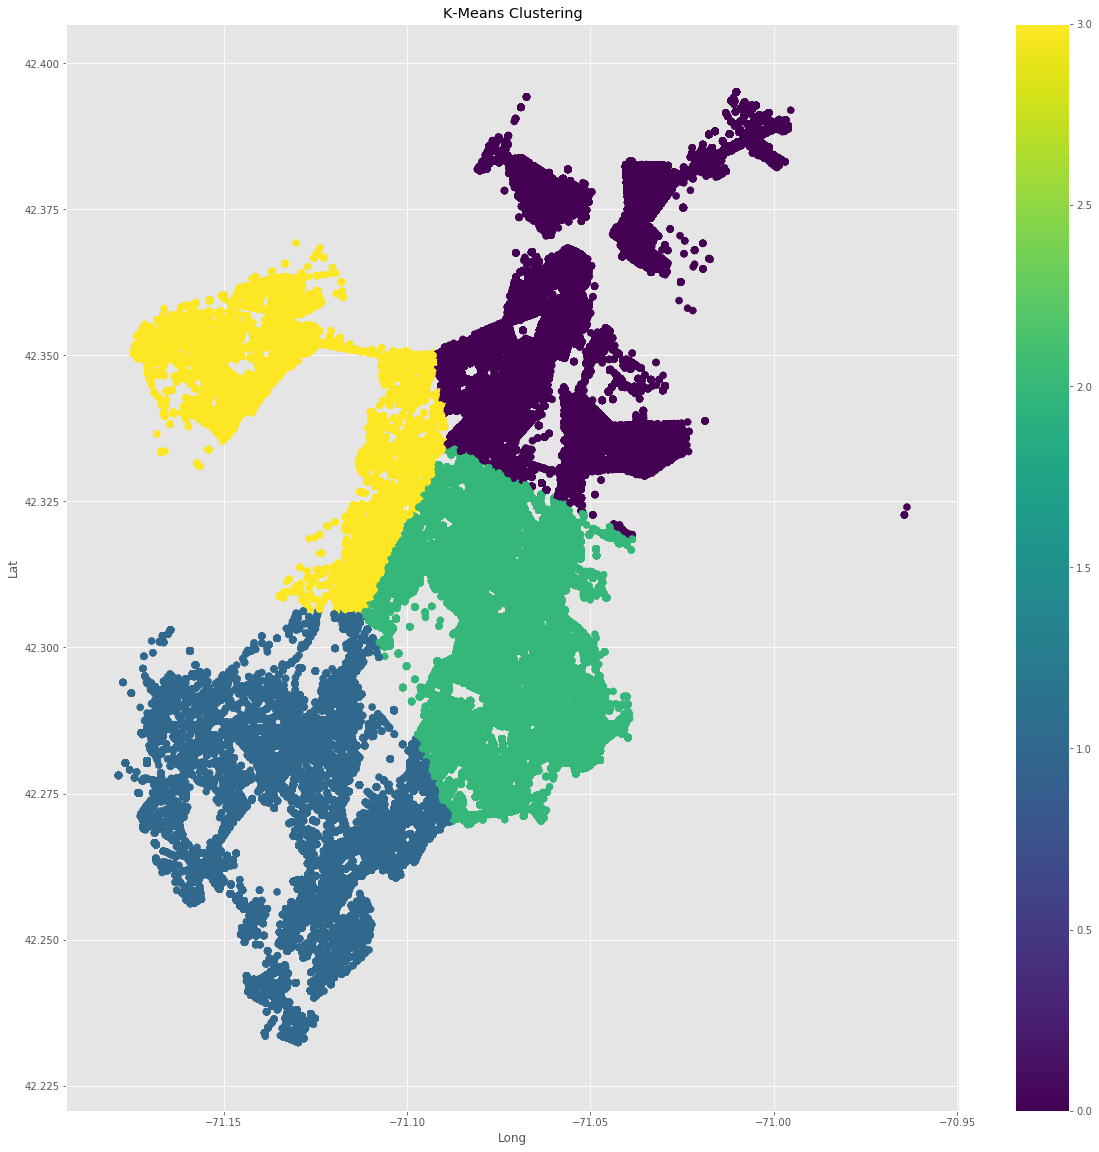

In [61]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [62]:
X = location
X = X[~np.isnan(X)]

In [63]:
#K-means Clustering: 5 iterations
clust_labels, cent = doKmeans(X, 5)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

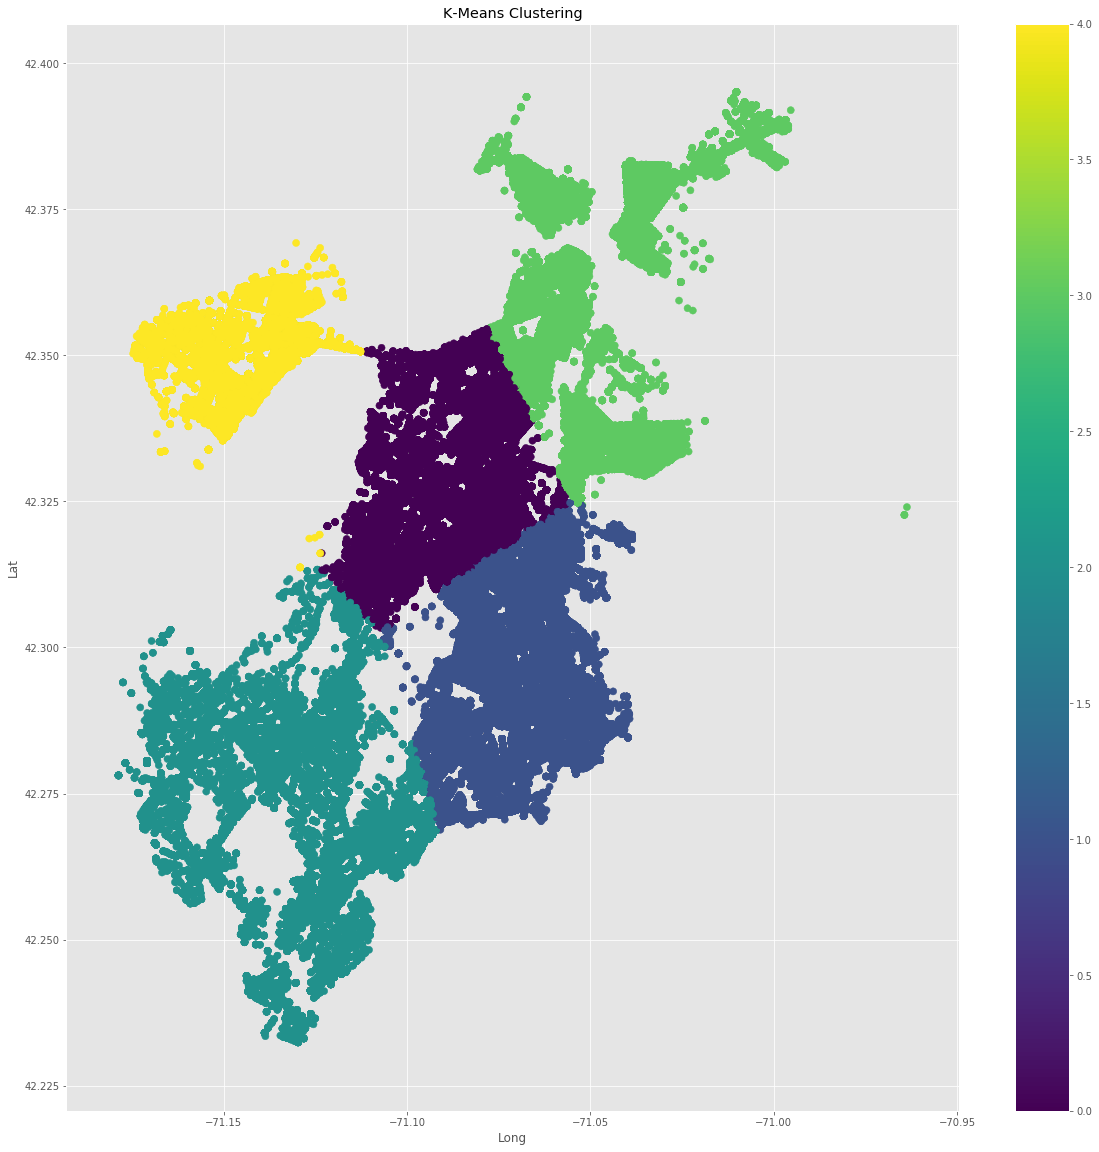

In [64]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [65]:
#Define foursquare credentials and version
CLIENT_ID = 'L2I4QD2UPIJ04JNIR5YVKP3NXPY1PZ1IMPPBM1K5QV1DSXBZ' # your Foursquare ID
CLIENT_SECRET = 'ZLCLU03OP4CCCFALX5HQOHIQTWHSZGB01ZJZDKGMWRJLPNPB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L2I4QD2UPIJ04JNIR5YVKP3NXPY1PZ1IMPPBM1K5QV1DSXBZ
CLIENT_SECRET:ZLCLU03OP4CCCFALX5HQOHIQTWHSZGB01ZJZDKGMWRJLPNPB


In [67]:
pip install BeautifulSoup4

     |████████████████████████████████| 112kB 8.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
pip install geopy

     |████████████████████████████████| 112kB 19.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install geopandas

     |████████████████████████████████| 931kB 8.1MB/s eta 0:00:01�█████████▍      | 737kB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 37.0MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 6.9MB/s eta 0:00:011��██████████████████████████▉ | 14.2MB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 17.3MB/s eta 0:00:01    |██████████████████▌             | 6.0MB 17.3MB/s eta 0:00:01     |████████████████████▊           | 6.7MB 17.3MB/s eta 0:00:01█████████████████         | 7.4MB 17.3MB/s eta 0:00:01     |█████████████████████████       | 8.1MB 17.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 26.6MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
Note: you may need to restart the kernel to use updated packages.


In [1]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [2]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

In [3]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

In [5]:
import folium # plotting library

In [6]:
#Define foursquare credentials and version
CLIENT_ID = 'L2I4QD2UPIJ04JNIR5YVKP3NXPY1PZ1IMPPBM1K5QV1DSXBZ'
CLIENT_SECRET = 'ZLCLU03OP4CCCFALX5HQOHIQTWHSZGB01ZJZDKGMWRJLPNPB'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L2I4QD2UPIJ04JNIR5YVKP3NXPY1PZ1IMPPBM1K5QV1DSXBZ
CLIENT_SECRET:ZLCLU03OP4CCCFALX5HQOHIQTWHSZGB01ZJZDKGMWRJLPNPB


In [7]:
latitude = 40.715337
longitude = -74.008848

In [9]:
address = 'Boston, MA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

42.3602534 -71.0582912


In [15]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')

Italian .... OK!


In [16]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=L2I4QD2UPIJ04JNIR5YVKP3NXPY1PZ1IMPPBM1K5QV1DSXBZ&client_secret=ZLCLU03OP4CCCFALX5HQOHIQTWHSZGB01ZJZDKGMWRJLPNPB&ll=42.3602534,-71.0582912&v=20180604&query=Italian&radius=500&limit=30'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e7ae2bdc546f3001b30ce79'},
 'response': {'venues': [{'id': '4db9e3bf93a080554829bf7e',
    'name': 'Italian Sausage Hotdog',
    'location': {'crossStreet': 'Washingyon/ DeLafayette',
     'lat': 42.35647628622365,
     'lng': -71.05932066179064,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.35647628622365,
       'lng': -71.05932066179064}],
     'distance': 428,
     'cc': 'US',
     'city': 'Boston',
     'state': 'MA',
     'country': 'United States',
     'formattedAddress': ['Washingyon/ DeLafayette',
      'Boston, MA',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'shortName': 'Food Truck',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1585111780',
    'hasPerk': False},
   {'id': '4ca216f746978cfa5aa1c17f',
    'nam

In [18]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.formattedAddress,location.address,location.postalCode,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4db9e3bf93a080554829bf7e,Italian Sausage Hotdog,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1585111780,False,Washingyon/ DeLafayette,42.356476,-71.059321,"[{'label': 'display', 'lat': 42.35647628622365...",428,...,"[Washingyon/ DeLafayette, Boston, MA, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4ca216f746978cfa5aa1c17f,Pavia - Italian Cuisine & Catering,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1585111780,False,btwn Congress & Kilby St.,42.357752,-71.055913,"[{'label': 'display', 'lat': 42.35775184002537...",340,...,"[82 Water St (btwn Congress & Kilby St.), Bost...",82 Water St,02109,295963,https://www.grubhub.com/restaurant/pavia-82-wa...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,93245254
2,4ad5ffd6f964a520620421e3,Rabia's Seafood/Oyster Bar & Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1585111780,False,btwn Morton St. & Stillman St.,42.363377,-71.055977,"[{'label': 'display', 'lat': 42.36337703225326...",396,...,"[73 Salem St (btwn Morton St. & Stillman St.),...",73 Salem St,02113,NaN,NaN,NaN,NaN,NaN,NaN,94647792
3,4e4c3696bd413c4cc667c16a,Pepperoncini's Italian Cafe,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1585111780,False,NaN,42.357720,-71.058007,"[{'label': 'display', 'lat': 42.35772, 'lng': ...",282,...,"[275 Washington St, Boston, MA 02108, United S...",275 Washington St,02108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5585fa2b498e12103dcf7751,Lucca Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1585111780,False,NaN,42.363238,-71.055032,"[{'label': 'display', 'lat': 42.363237971363, ...",426,...,"[Boston, MA, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,postalCode,id
0,Italian Sausage Hotdog,Food Truck,Washingyon/ DeLafayette,42.356476,-71.059321,"[{'label': 'display', 'lat': 42.35647628622365...",428,US,Boston,MA,United States,"[Washingyon/ DeLafayette, Boston, MA, United S...",NaN,NaN,4db9e3bf93a080554829bf7e
1,Pavia - Italian Cuisine & Catering,Italian Restaurant,btwn Congress & Kilby St.,42.357752,-71.055913,"[{'label': 'display', 'lat': 42.35775184002537...",340,US,Boston,MA,United States,"[82 Water St (btwn Congress & Kilby St.), Bost...",82 Water St,02109,4ca216f746978cfa5aa1c17f
2,Rabia's Seafood/Oyster Bar & Italian Restaurant,Italian Restaurant,btwn Morton St. & Stillman St.,42.363377,-71.055977,"[{'label': 'display', 'lat': 42.36337703225326...",396,US,Boston,MA,United States,"[73 Salem St (btwn Morton St. & Stillman St.),...",73 Salem St,02113,4ad5ffd6f964a520620421e3
3,Pepperoncini's Italian Cafe,Italian Restaurant,NaN,42.357720,-71.058007,"[{'label': 'display', 'lat': 42.35772, 'lng': ...",282,US,Boston,MA,United States,"[275 Washington St, Boston, MA 02108, United S...",275 Washington St,02108,4e4c3696bd413c4cc667c16a
4,Lucca Italian Restaurant,Italian Restaurant,NaN,42.363238,-71.055032,"[{'label': 'display', 'lat': 42.363237971363, ...",426,US,Boston,MA,United States,"[Boston, MA, United States]",NaN,NaN,5585fa2b498e12103dcf7751
5,Urban Italian Kitchen,Italian Restaurant,NaN,42.362829,-71.055310,"[{'label': 'display', 'lat': 42.36282896636297...",377,US,Boston,MA,United States,"[227 Hanover St, Boston, MA 02113, United States]",227 Hanover St,02113,4ed7c8ae77c86e4f2bea5b9c
6,D'Amore's Italian Restaurant,Italian Restaurant,NaN,42.363518,-71.055904,"[{'label': 'display', 'lat': 42.363518, 'lng':...",413,US,Boston,MA,United States,"[76 Salem St, Boston, MA 02113, United States]",76 Salem St,02113,4e4c348bbd413c4cc667b40f
7,Portofino's Italian Kitchen,Italian Restaurant,NaN,42.357676,-71.053925,"[{'label': 'display', 'lat': 42.357676, 'lng':...",459,US,Boston,MA,United States,"[71 Broad St, Boston, MA 02109, United States]",71 Broad St,02109,51f7eec4498e904fcf987fff
8,Bacco,Italian Restaurant,ar Parmenter St.,42.364083,-71.055505,"[{'label': 'display', 'lat': 42.36408284196774...",483,US,Boston,MA,United States,"[107 Salem St (ar Parmenter St.), Boston, MA 0...",107 Salem St,02113,4a6c8c43f964a520cbd01fe3
9,Comitato Tricolore Per Gli Italiani Mel Mondo,Italian Restaurant,NaN,42.362744,-71.055241,"[{'label': 'display', 'lat': 42.362744, 'lng':...",373,US,Boston,MA,United States,"[215 Hanover St, Boston, MA 02113, United States]",215 Hanover St,02113,4f32859f19836c91c7dffe92


In [20]:
dataframe_filtered.name

0                              Italian Sausage Hotdog
1                  Pavia - Italian Cuisine & Catering
2     Rabia's Seafood/Oyster Bar & Italian Restaurant
3                         Pepperoncini's Italian Cafe
4                            Lucca Italian Restaurant
5                               Urban Italian Kitchen
6                        D'Amore's Italian Restaurant
7                         Portofino's Italian Kitchen
8                                               Bacco
9       Comitato Tricolore Per Gli Italiani Mel Mondo
10                                         Lo Conte's
11                                 Salumeria Italiana
Name: name, dtype: object

In [21]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Boston

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [26]:
latitude = 42.37435896
longitude = -71.06429459

In [27]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=L2I4QD2UPIJ04JNIR5YVKP3NXPY1PZ1IMPPBM1K5QV1DSXBZ&client_secret=ZLCLU03OP4CCCFALX5HQOHIQTWHSZGB01ZJZDKGMWRJLPNPB&ll=42.37435896,-71.06429459&v=20180604&radius=500&limit=30'

In [28]:
import requests

In [29]:
results = requests.get(url).json()
'There are {} around this location.'.format(len(results['response']['groups'][0]['items']))

'There are 30 around this location.'

In [30]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '44394daff964a5201c321fe3',
  'name': 'Warren Tavern',
  'location': {'address': '2 Pleasant St',
   'crossStreet': 'at Main St',
   'lat': 42.374108,
   'lng': -71.063143,
   'labeledLatLngs': [{'label': 'display',
     'lat': 42.374108,
     'lng': -71.063143}],
   'distance': 98,
   'postalCode': '02129',
   'cc': 'US',
   'city': 'Boston',
   'state': 'MA',
   'country': 'United States',
   'formattedAddress': ['2 Pleasant St (at Main St)',
    'Boston, MA 02129',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d11b941735',
    'name': 'Pub',
    'pluralName': 'Pubs',
    'shortName': 'Pub',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
     'suffix': '.png'},
    'primary': True}],
  'delivery': {'id': '2031875',
   'url': 'https://www.grubhub.com/restaurant/warren-tavern-res

In [31]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Warren Tavern,Pub,2 Pleasant St,at Main St,42.374108,-71.063143,"[{'label': 'display', 'lat': 42.374108, 'lng':...",98,02129,US,Boston,MA,United States,"[2 Pleasant St (at Main St), Boston, MA 02129,...",44394daff964a5201c321fe3
1,Figs,Pizza Place,67 Main St,at Winthrop St.,42.373588,-71.062463,"[{'label': 'display', 'lat': 42.37358769797685...",173,02129,US,Charlestown,MA,United States,"[67 Main St (at Winthrop St.), Charlestown, MA...",4b11c019f964a520d08323e3
2,Whole Foods Market,Grocery Store,51 Austin Street,NaN,42.375511,-71.065976,"[{'label': 'display', 'lat': 42.37551146700839...",188,02129,US,Charlestown,MA,United States,"[51 Austin Street, Charlestown, MA 02129, Unit...",51f90946498e7e4b05685dff
3,Monument Restaurant & Tavern,Gastropub,251 Main St,School,42.376865,-71.066053,"[{'label': 'display', 'lat': 42.37686494887256...",314,02129,US,Charlestown,MA,United States,"[251 Main St (School), Charlestown, MA 02129, ...",586d78f9de0cbc0b7f87e131
4,CorePower Yoga,Yoga Studio,19 Austin St Ste E101,NaN,42.375876,-71.065424,"[{'label': 'display', 'lat': 42.37587569999999...",192,02129,US,Charlestown,MA,United States,"[19 Austin St Ste E101, Charlestown, MA 02129,...",5d60f43992ab450008e007f1
5,Charlestown Liquors,Liquor Store,94-100 Main St,NaN,42.375095,-71.063915,"[{'label': 'display', 'lat': 42.37509538273349...",87,02129,US,Charlestown,MA,United States,"[94-100 Main St, Charlestown, MA 02129, United...",4b5379f4f964a520e99e27e3
6,Tangierino,Moroccan Restaurant,83 Main St,at Monument Ave.,42.373950,-71.062880,"[{'label': 'display', 'lat': 42.37395, 'lng': ...",124,02129,US,Charlestown,MA,United States,"[83 Main St (at Monument Ave.), Charlestown, M...",4a0c3163f964a52016751fe3
7,The Battle Of Bunker Hill Museum,History Museum,Monument Square,NaN,42.375772,-71.061159,"[{'label': 'display', 'lat': 42.37577204134754...",302,NaN,US,Charlestown,MA,United States,"[Monument Square, Charlestown, MA, United States]",4bffefa9daf9c9b6e2f2faef
8,Bunker Hill Monument,Monument / Landmark,31 Monument Sq,NaN,42.376072,-71.060835,"[{'label': 'display', 'lat': 42.37607181402598...",342,02129,US,Boston,MA,United States,"[31 Monument Sq, Boston, MA 02129, United States]",4a7a5311f964a52029e91fe3
9,Starbucks,Coffee Shop,1 Thompson Sq,NaN,42.375207,-71.064010,"[{'label': 'display', 'lat': 42.37520725862152...",97,02129,US,Charlestown,MA,United States,"[1 Thompson Sq, Charlestown, MA 02129, United ...",5a7454df6336be6665f8ac62


In [32]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around latitude = 42.37435896 and longitude = -71.06429459 


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map